Audio dataset exploration for Drone Detection task:

The dataset is composed by two types of audio recordings. 
Yes_drone :
Unknown

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import scipy.io
import os

In [3]:
file = "/home/raphalinux/PycharmProjects/pythonProject/projet_sys/data/Binary_Drone_Audio"

In [4]:
from scipy.io import wavfile

In [23]:
audio_info={}

for class_name in os.listdir(file):
    class_path = os.path.join(file,class_name)

    if os.path.isdir(class_path):
        file_count = 0
        durations = []
        frame_rates = []

        for file_name in os.listdir(class_path):
            if file_name.endswith(".wav"):
                file_path = os.path.join(class_path,file_name)

                try:
                    sample_rate , audio = wavfile.read(file_path)
                    file_count+=1
                    frame_rates.append(sample_rate)
                    durations.append(len(audio)/sample_rate)

                except Exception as e:
                    print(f"Error when reading the file {file_name} : {e}")
                
    if file_count > 0:
        audio_info[class_name] = {
            "file_number" : file_count,
            "mean_duration" : np.mean(durations),
            "mean_sample_rate" : np.mean(sample_rate),
            "max_duration" : np.max(durations),
            "min_duration" : np.min(durations)

        }

In [24]:
for class_name, info in audio_info.items():
    print(f"\nClasse: {class_name}")
    print(f" - Nombre de fichiers : {info['file_number']}")
    print(f" - Durée moyenne : {info['mean_duration']:.2f} sec")
    print(f" - Durée max : {info['max_duration']:.2f} sec")
    print(f" - Durée min : {info['min_duration']:.2f} sec")
    print(f" - Fréquence d’échantillonnage moyenne : {info['mean_sample_rate']:.0f} Hz")


Classe: yes_drone
 - Nombre de fichiers : 1332
 - Durée moyenne : 1.00 sec
 - Durée max : 1.02 sec
 - Durée min : 0.65 sec
 - Fréquence d’échantillonnage moyenne : 16000 Hz

Classe: unknown
 - Nombre de fichiers : 1372
 - Durée moyenne : 1.02 sec
 - Durée max : 5.12 sec
 - Durée min : 0.00 sec
 - Fréquence d’échantillonnage moyenne : 16000 Hz


In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))
from data_processing import DataProcessing

2025-02-25 12:23:15.642581: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-25 12:23:15.704006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-25 12:23:16.164592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-25 12:23:16.169578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-25 12:23:17.754533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [110]:
audio_dataset = DataProcessing(file)

SHAPE: (14464,)


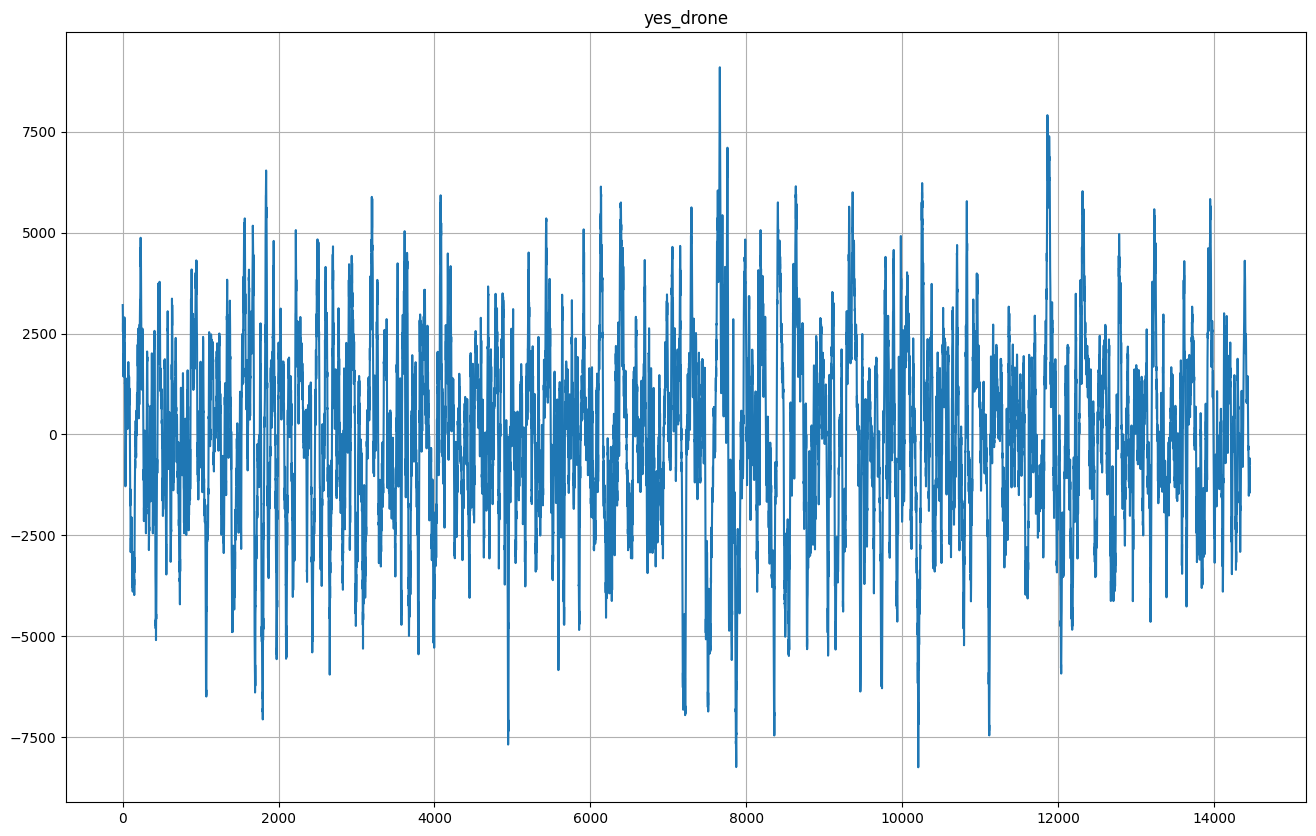

SHAPE: (16347,)


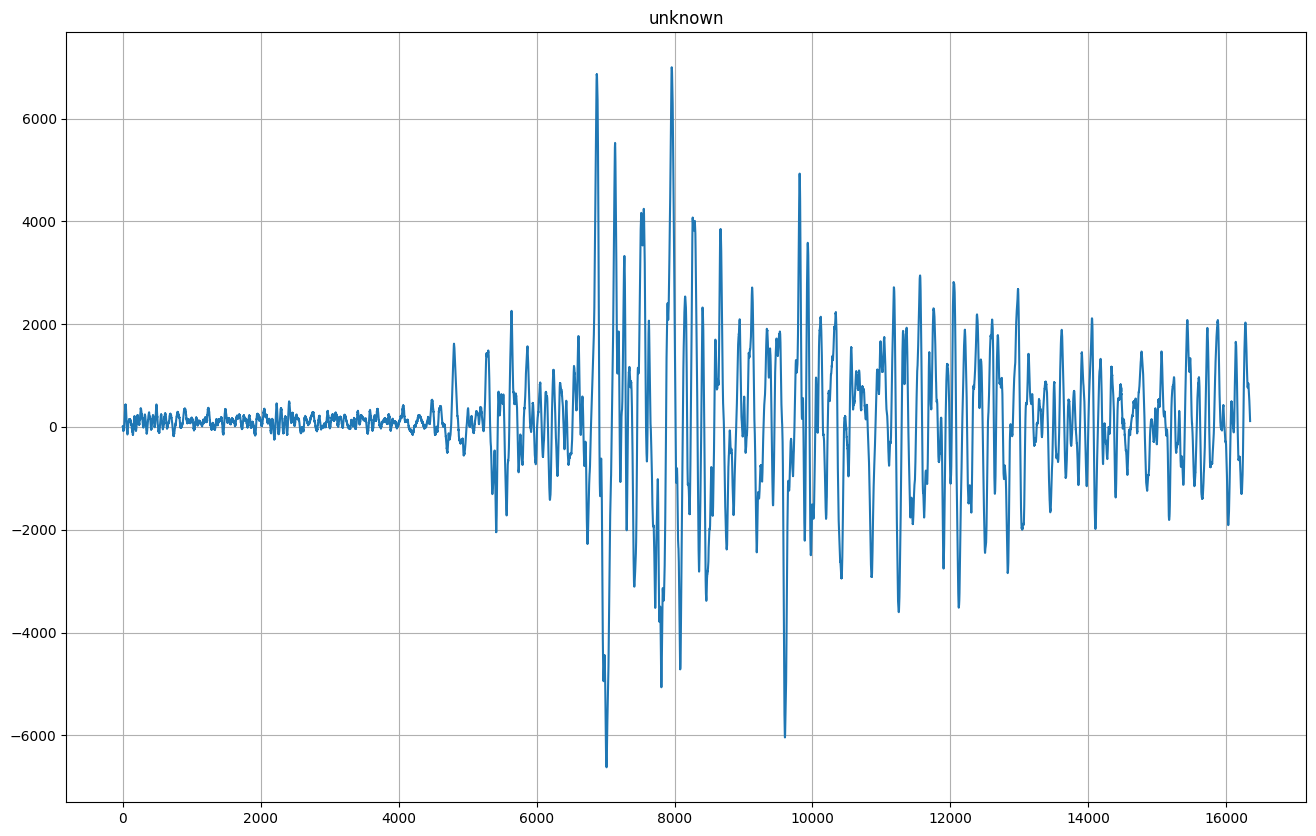

In [27]:
audio_dataset = DataProcessing(file)
audio_dataset.plot_waveform(1)
audio_dataset.plot_waveform(1,"unknown")

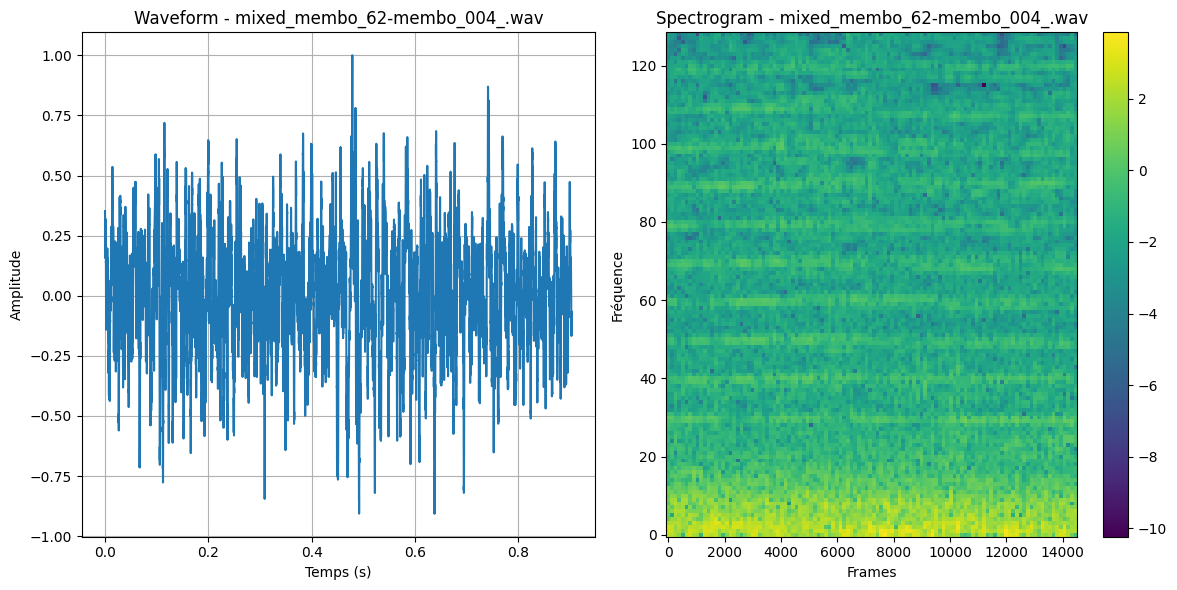

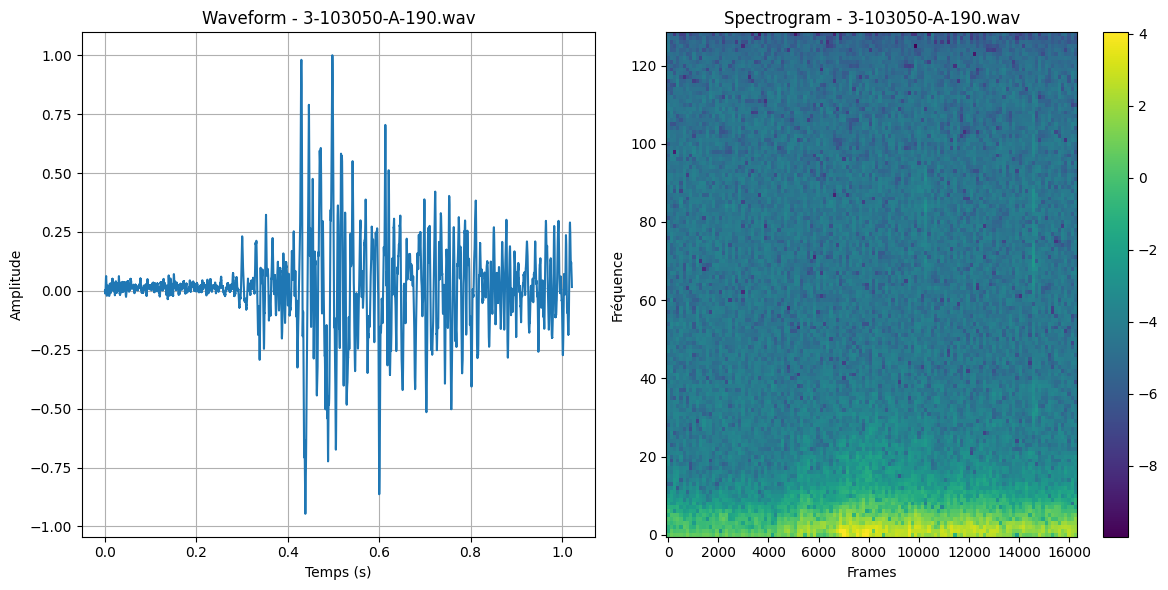

In [28]:
audio_dataset.plot_spectrogram(1)
audio_dataset.plot_spectrogram(1,"unknown")

In [118]:
train_set, val_set, test_set = audio_dataset.get_spectrogram_dataset()

GO
Found 2704 files belonging to 2 classes.
Using 2569 files for training.
Found 2704 files belonging to 2 classes.
Using 135 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Label names: ['unknown' 'yes_drone']
(TensorSpec(shape=(None, 124, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [112]:
from model import Model

Binary_classification_Model = Model(train_set)
Binary_CNN = Binary_classification_Model.CNN()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_10 (Resizing)      (None, 32, 32, 1)         0         
                                                                 
 normalization_10 (Normaliz  (None, 32, 32, 1)         3         
 ation)                                                          
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 64)      

In [113]:
from train import Train

training = Train(50, train_set,val_set,Binary_CNN)

Epoch 1/50
29/29 [==============================] - 3s 66ms/step - loss: 0.5075 - accuracy: 0.7785 - val_loss: 0.2739 - val_accuracy: 0.9185
Epoch 2/50
29/29 [==============================] - 2s 57ms/step - loss: 0.2894 - accuracy: 0.8934 - val_loss: 0.2205 - val_accuracy: 0.9333
Epoch 3/50
29/29 [==============================] - 2s 59ms/step - loss: 0.2417 - accuracy: 0.9100 - val_loss: 0.1535 - val_accuracy: 0.9556
Epoch 4/50
29/29 [==============================] - 2s 56ms/step - loss: 0.1960 - accuracy: 0.9245 - val_loss: 0.1873 - val_accuracy: 0.9259
Epoch 5/50
29/29 [==============================] - 2s 57ms/step - loss: 0.1641 - accuracy: 0.9417 - val_loss: 0.1098 - val_accuracy: 0.9481
Epoch 6/50
29/29 [==============================] - 2s 59ms/step - loss: 0.1366 - accuracy: 0.9500 - val_loss: 0.1172 - val_accuracy: 0.9481
Epoch 7/50
29/29 [==============================] - 2s 54ms/step - loss: 0.1026 - accuracy: 0.9656 - val_loss: 0.0808 - val_accuracy: 0.9704
Epoch 8/50
29

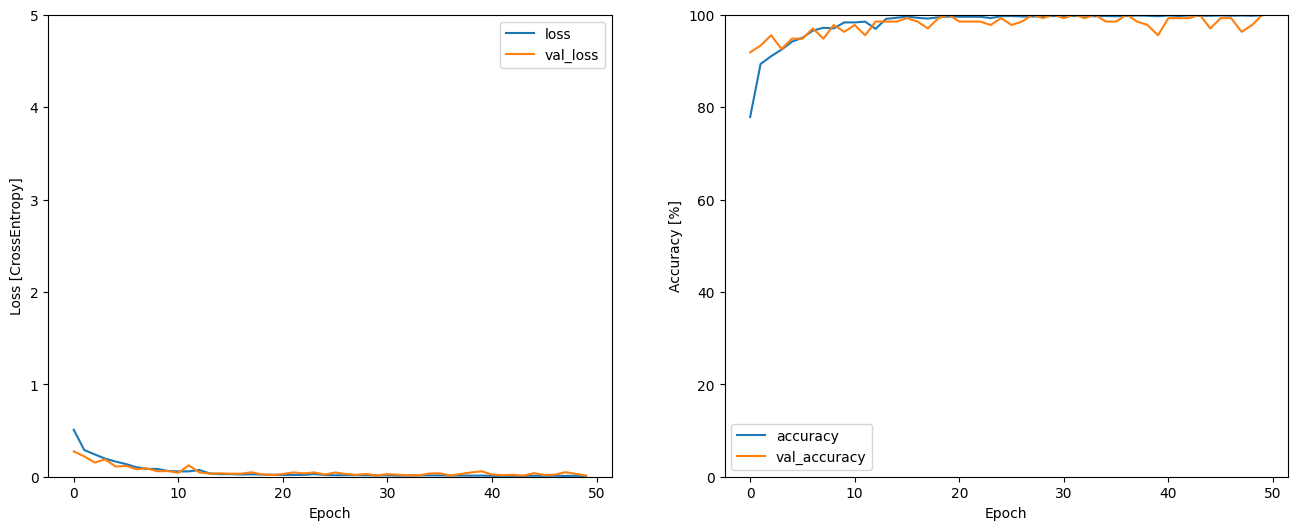

In [114]:
trained_cnn_1 = training.training_loop()

In [115]:
from evaluate import Evaluate

evaluation = Evaluate(trained_cnn_1,test_set,["No","Yes"])

In [116]:
y_true, y_pred, precision, recall, f1 = evaluation.accuracy()

12/12 [==============================] - 1s 29ms/step - loss: 0.0708 - accuracy: 0.9779
Model accuracy on test dataset: 0.9778645634651184
12/12 [==============================] - 0s 16ms/step
Cause: could not parse the source code of <function Evaluate.accuracy.<locals>.<lambda> at 0x7fc161923c10>: no matching AST found among candidates:
# coding=utf-8
(lambda s, lab: lab)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function Evaluate.accuracy.<locals>.<lambda> at 0x7fc161923c10>: no matching AST found among candidates:
# coding=utf-8
(lambda s, lab: lab)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function Evaluate.accuracy.<locals>.<lambda> at 0x7fc161923c10>: no matching AST found among candidates:
# coding=utf-8
(lambda s, lab: lab)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model accuracy on test dataset : 0.9778645833333334
Precision: 0.98
Recall: 0.98
F1-Score: 0.98


New confusion matrix
New confusion matrix


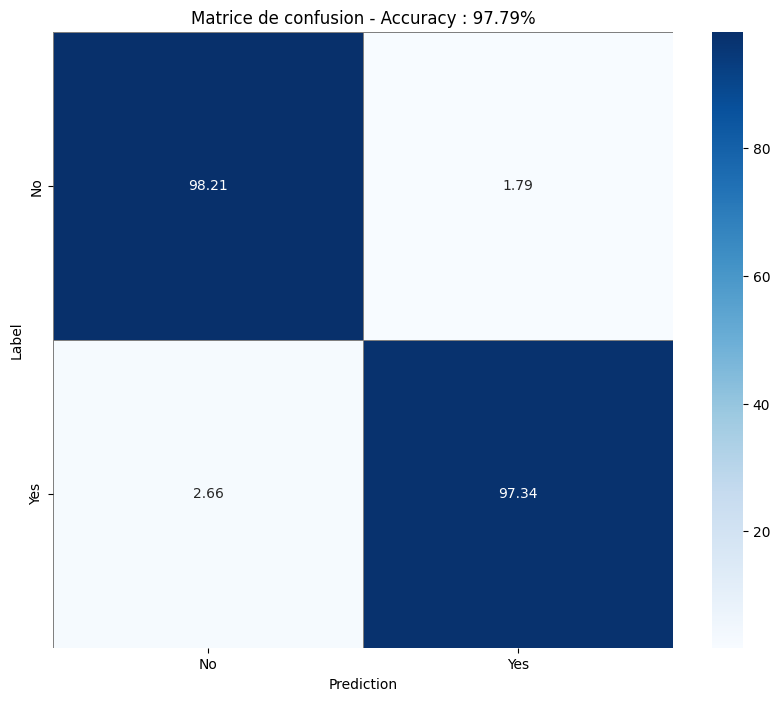

In [119]:
evaluation.conf_matrix(y_true, y_pred)

In [71]:
training.save_model(trained_cnn_1,"First_CNN")

INFO:tensorflow:Assets written to: saved_model/First_CNN/assets


INFO:tensorflow:Assets written to: saved_model/First_CNN/assets


Modèle sauvegardé à : saved_model/First_CNN


Detection based on Mel-Spectro

In [6]:
audio_for_mel = DataProcessing(file)

(129, 124)
(129, 124)


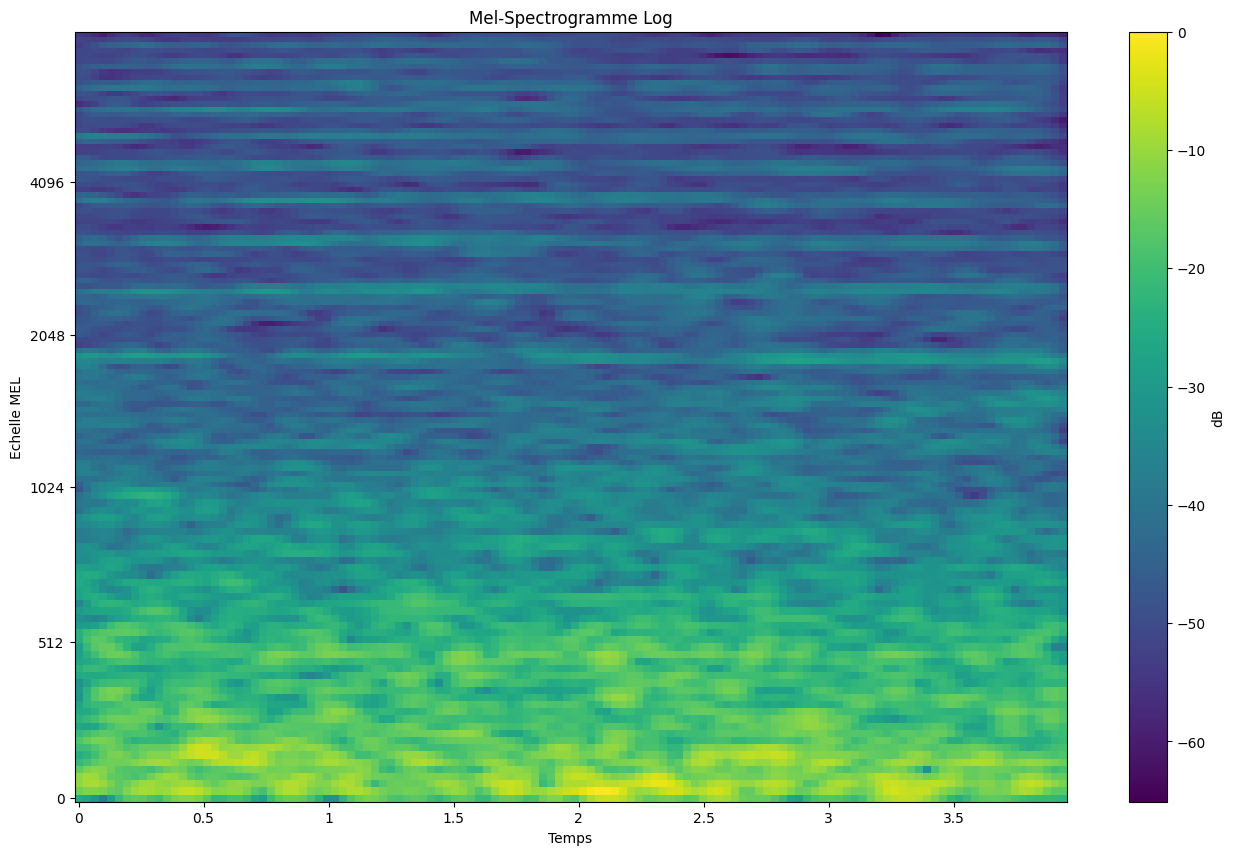

In [9]:
audio_for_mel.plot_mel_spectrogram(1)

(129, 124)
(129, 124)


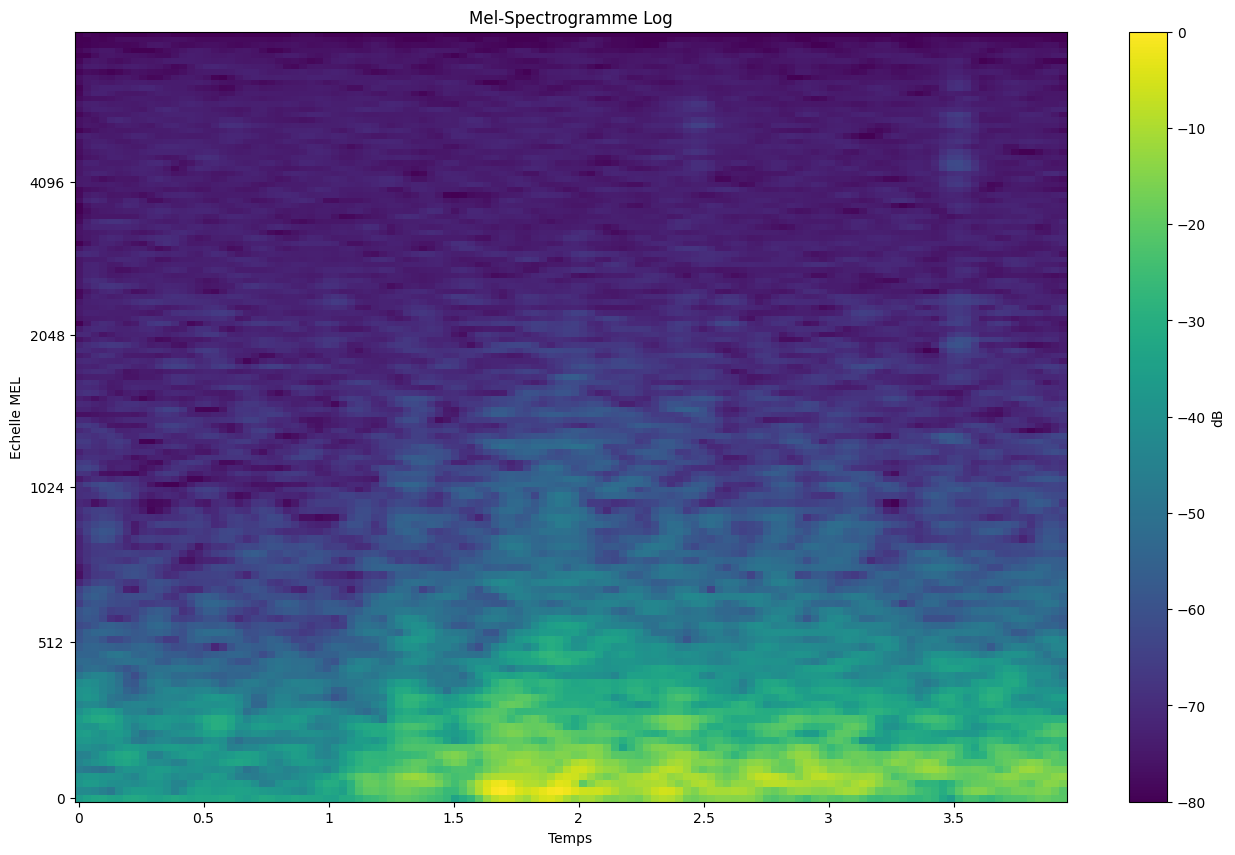

(129, 124)
(129, 124)


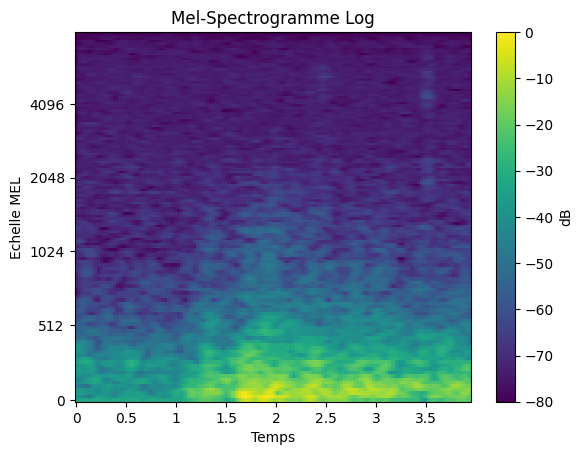

(129, 124)
(129, 124)


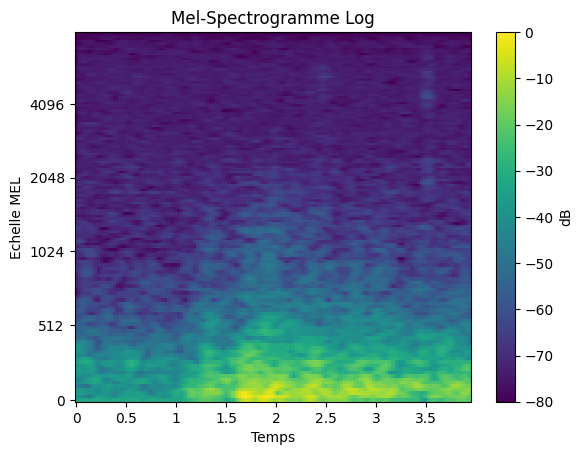

(129, 124)
(129, 124)


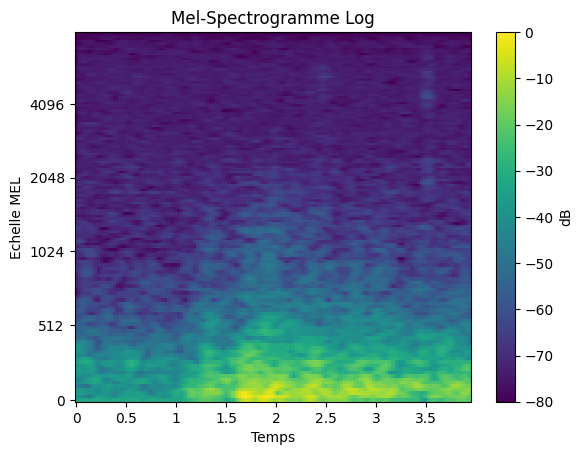

(129, 124)
(129, 124)


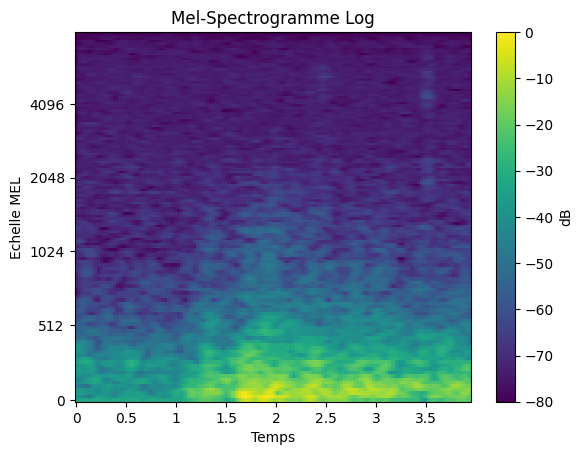

(129, 124)
(129, 124)


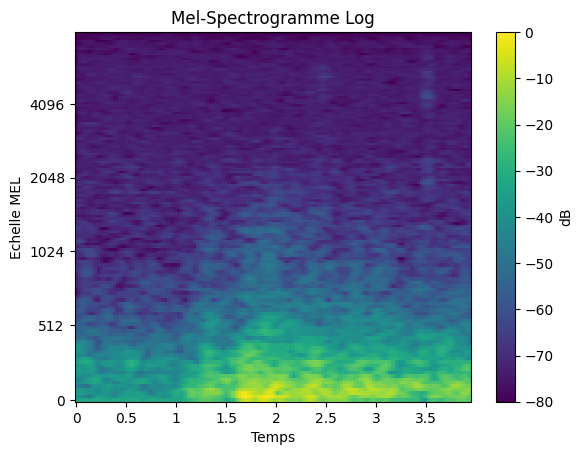

(129, 124)
(129, 124)


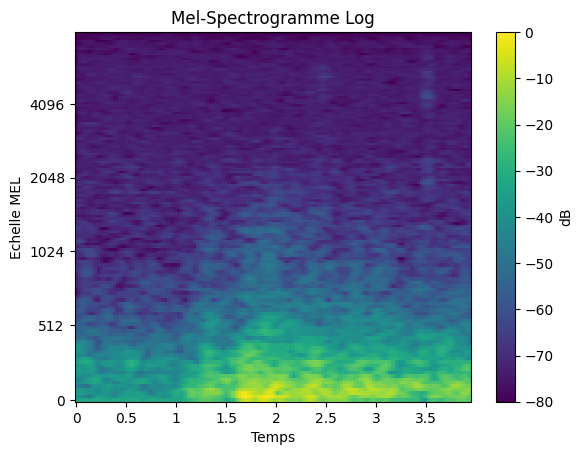

(129, 124)
(129, 124)


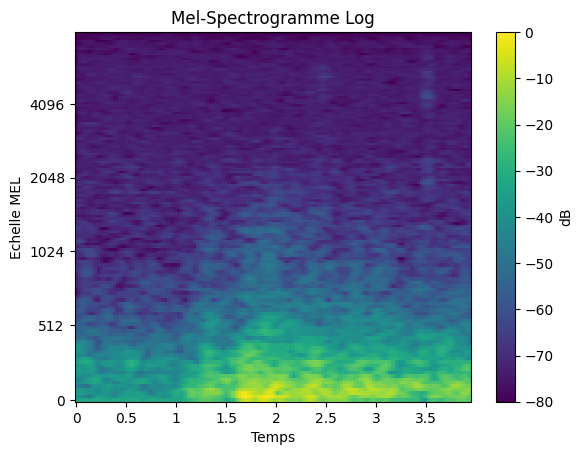

In [12]:
audio_for_mel.plot_mel_spectrogram(8,"unknown")

In [7]:
train_mel_set , val_mel_set, test_mel_set = audio_for_mel.get_mel_spectrogram_dataset()

GO
Found 2704 files belonging to 2 classes.
Using 2569 files for training.
Found 2704 files belonging to 2 classes.
Using 135 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Label names: ['unknown' 'yes_drone']
(TensorSpec(shape=(None, 124, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [8]:
from model import Model

Binary_mel_model = Model(train_mel_set)
mel_training_model = Binary_mel_model.CNN()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizati  (None, 32, 32, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0

In [91]:
for mel_spec, label in train_mel_set.take(5):
    print(f"Mel spectrogram shape: {mel_spec.shape}, Label: {label}")
    

Mel spectrogram shape: (64, 124, 129, 1), Label: [0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0
 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1]
Mel spectrogram shape: (64, 124, 129, 1), Label: [0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0
 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1]
Mel spectrogram shape: (64, 124, 129, 1), Label: [1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
Mel spectrogram shape: (64, 124, 129, 1), Label: [1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0]
Mel spectrogram shape: (64, 124, 129, 1), Label: [0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0]


In [9]:
from train import Train

Training_mel = Train(50, train_mel_set, val_mel_set, mel_training_model)

In [10]:
trained_mel_model = Training_mel.training_loop()

Epoch 1/50
29/29 [==============================] - 3s 66ms/step - loss: 0.6933 - accuracy: 0.4942 - val_loss: 0.6923 - val_accuracy: 0.5259
Epoch 2/50
29/29 [==============================] - 2s 58ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6925 - val_accuracy: 0.5259
Epoch 3/50
29/29 [==============================] - 2s 55ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6925 - val_accuracy: 0.5259
Epoch 4/50
29/29 [==============================] - 2s 53ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6925 - val_accuracy: 0.5259
Epoch 5/50
29/29 [==============================] - 1s 51ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6925 - val_accuracy: 0.5259
Epoch 6/50
29/29 [==============================] - 2s 55ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6925 - val_accuracy: 0.5259
Epoch 7/50
29/29 [==============================] - 2s 52ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6925 - val_accuracy: 0.5259
Epoch 8/50
26

KeyboardInterrupt: 

In [15]:
from evaluate import Evaluate

evaluation_mel = Evaluate(trained_mel_model, test_mel_set,[0,1])

In [16]:
y_true_mel, y_pred_mel, precision_mel, recall_mel, f1_mel = evaluation_mel.accuracy() 

12/12 [==============================] - 1s 35ms/step - loss: 0.6930 - accuracy: 0.5104
Model accuracy on test dataset: 0.5104166865348816
12/12 [==============================] - 0s 19ms/step
Model accuracy on test dataset : 0.5104166666666666
Precision: 0.26
Recall: 0.51
F1-Score: 0.34


/home/raphalinux/projet_sys/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
